In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output="pandas")
from preprocessing_93 import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.simplefilter('ignore')
RSEED = 5







## Preprocessing

In [2]:
df = pd.read_csv("data/AQUASTAT_complete.csv")

In [3]:
pre_split_processor = get_pre_split_processor_93()
df_pre = pre_split_processor.fit_transform(df)

In [4]:
df_pre = df_pre.query("year > 1992")

In [5]:
full_preprocessor = get_full_preprocessor_93(df_pre.columns.to_list(), hot=False)

df_pro = full_preprocessor.fit_transform(df_pre)

In [6]:
df_pro.head()

,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,groundwater_accounted_inflow,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,country,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water
29,0.42963,-0.106528,1.105174,1.001781,1.317100,2.337318,0.734579,0.251313,0.084084,-0.087237,...,-0.096457,0.973941,1.605272,-0.264962,-0.202617,Afghanistan,1993,179.839036,61.906480,21.4
30,0.42963,-0.121301,1.096506,0.993103,1.315969,2.639310,0.726701,0.243083,0.084084,-0.087237,...,-0.136904,0.962895,1.462471,-0.220348,-0.202617,Afghanistan,1994,100.444869,60.475171,21.4
31,0.42963,-0.128683,1.087626,0.984213,1.314784,2.473168,0.722750,0.236760,0.084084,-0.087237,...,-0.226799,0.951585,1.347776,-0.183809,-0.202617,Afghanistan,1995,152.221868,59.043863,21.5
32,0.42963,-0.128807,1.078526,0.975102,1.313539,2.411257,0.722684,0.232441,0.084084,-0.087237,...,-0.189200,0.939998,1.260279,-0.155988,-0.202617,Afghanistan,1996,141.607370,57.612555,23.3
33,0.42963,-0.124127,1.069192,0.965757,1.312230,2.368001,0.725190,0.229608,0.084084,-0.087237,...,-0.203122,0.928119,1.191977,-0.134623,-0.202617,Afghanistan,1997,151.085927,56.181246,25.0


### Label encoding Country


In [7]:
# Label encode country
label_encoder = LabelEncoder()
label_encoder.fit(df_pro['country'])

df_pro['country_encoded'] = label_encoder.transform(df_pro['country'])

country_code = dict(zip(label_encoder.transform(df_pro['country']), df_pro['country']))

country_code

{0: 'Afghanistan',
 1: 'Albania',
 2: 'Algeria',
 3: 'Angola',
 4: 'Argentina',
 5: 'Armenia',
 6: 'Australia',
 7: 'Austria',
 8: 'Azerbaijan',
 9: 'Bahrain',
 10: 'Bangladesh',
 11: 'Barbados',
 12: 'Belarus',
 13: 'Belgium',
 14: 'Belize',
 15: 'Benin',
 16: 'Bhutan',
 17: 'Bolivia (Plurinational State of)',
 18: 'Botswana',
 19: 'Brazil',
 20: 'Bulgaria',
 21: 'Burkina Faso',
 22: 'Burundi',
 23: 'Cabo Verde',
 24: 'Cambodia',
 25: 'Cameroon',
 26: 'Canada',
 27: 'Central African Republic',
 28: 'Chad',
 29: 'Chile',
 30: 'China',
 31: 'Colombia',
 32: 'Comoros',
 33: 'Congo',
 34: 'Costa Rica',
 35: 'Croatia',
 36: 'Cuba',
 37: 'Cyprus',
 38: 'Czechia',
 39: "Côte d'Ivoire",
 40: "Democratic People's Republic of Korea",
 41: 'Democratic Republic of the Congo',
 42: 'Denmark',
 43: 'Dominican Republic',
 44: 'Ecuador',
 45: 'Egypt',
 46: 'El Salvador',
 47: 'Eritrea',
 48: 'Estonia',
 49: 'Eswatini',
 50: 'Ethiopia',
 51: 'Fiji',
 52: 'Finland',
 53: 'France',
 54: 'Gabon',
 55: 'G

In [8]:
df_90 = df_pro[df_pro['year'] < 2001]
df_00 = df_pro[df_pro['year'].between(2001,2010)]
df_10 = df_pro[df_pro['year'].between(2011,2020)]

In [9]:
df_90['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000], dtype=int64)

In [10]:

# Group the data by country
df_pro_com = df_pro.groupby('country').mean().reset_index()
df_90_com = df_90.groupby('country').mean().reset_index()
df_00_com = df_00.groupby('country').mean().reset_index()
df_10_com = df_10.groupby('country').mean().reset_index()


df_pro_com.head(10)

,country,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,...,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable,year,gdp_per_capita,water_stress,total_population_with_access_to_safe_drinking_water,country_encoded
0,Afghanistan,0.429630,-0.112936,1.064577,0.961136,1.302179,1.629894,0.731157,0.197706,0.084084,...,-0.361997,0.923657,0.825113,0.099912,-0.202617,2006.5,339.557140,55.522527,40.703571,0.0
1,Albania,0.429630,0.647816,-0.169636,0.007421,-0.048517,0.956919,-0.512250,0.504118,-0.505430,...,0.370841,-0.402242,0.118463,-0.750315,-0.257835,2006.5,2882.937682,7.673583,95.632143,1.0
2,Algeria,0.429630,-1.090292,0.503603,1.028990,0.110733,0.017425,0.758367,0.297528,-0.748162,...,-1.412399,0.423175,-0.470469,0.910222,-0.268523,2006.5,3243.014455,99.424548,87.178571,2.0
3,Angola,-2.835104,-1.126102,-0.668594,-1.073887,-0.952153,-0.258967,0.394532,0.357423,-0.858488,...,0.205165,-0.695563,-1.521227,0.507738,-0.268597,2006.5,2429.465346,1.777295,46.982143,3.0
4,Argentina,0.429630,-0.120600,1.142951,0.090925,0.496920,-0.419239,1.468326,0.602085,1.341370,...,0.792510,1.157768,0.908125,1.200286,1.897976,2006.5,9246.514458,9.423177,97.392857,4.0
5,Armenia,0.429630,0.224779,0.170328,0.843906,0.346690,0.799090,-0.681920,0.389831,-0.479390,...,-0.341164,-0.061224,0.908883,-0.581305,-0.266704,2006.5,2350.615983,51.587942,95.928571,5.0
6,Australia,0.429630,-1.123184,0.862321,0.020865,0.217889,-0.956458,1.332684,0.613758,-0.867417,...,0.820100,0.863678,0.928911,0.777095,-0.270081,2006.5,41327.314780,6.834146,100.000000,6.0
7,Austria,0.429630,0.248058,-0.922747,-1.091898,-1.760581,-1.282439,-0.139384,0.326169,0.100394,...,0.332652,0.088941,0.135614,-0.009797,-0.185844,2006.5,38982.954817,9.770536,100.000000,7.0
8,Azerbaijan,0.429630,0.656138,0.758097,0.885759,0.505194,0.062457,0.058946,0.569797,1.670031,...,-0.119521,0.670304,1.539056,-0.044975,-0.171520,2006.5,3192.247917,52.866290,79.328571,8.0
9,Bahrain,0.429630,-0.658609,-0.724891,1.483934,-0.522457,-1.774063,-3.066628,-2.743422,2.331077,...,-1.957979,-0.973210,0.068378,-1.084002,-0.269666,2006.5,18066.502388,184.610115,99.082143,9.0


In [13]:
df_90_com.drop(['year', 'country'], axis=1, inplace=True)
df_00_com.drop(['year', 'country'], axis=1, inplace=True)
df_10_com.drop(['year', 'country'], axis=1, inplace=True)
df_pro_com.drop(['year', 'country'], axis=1, inplace=True)

### Clustering 

### Agglomerative Clustering

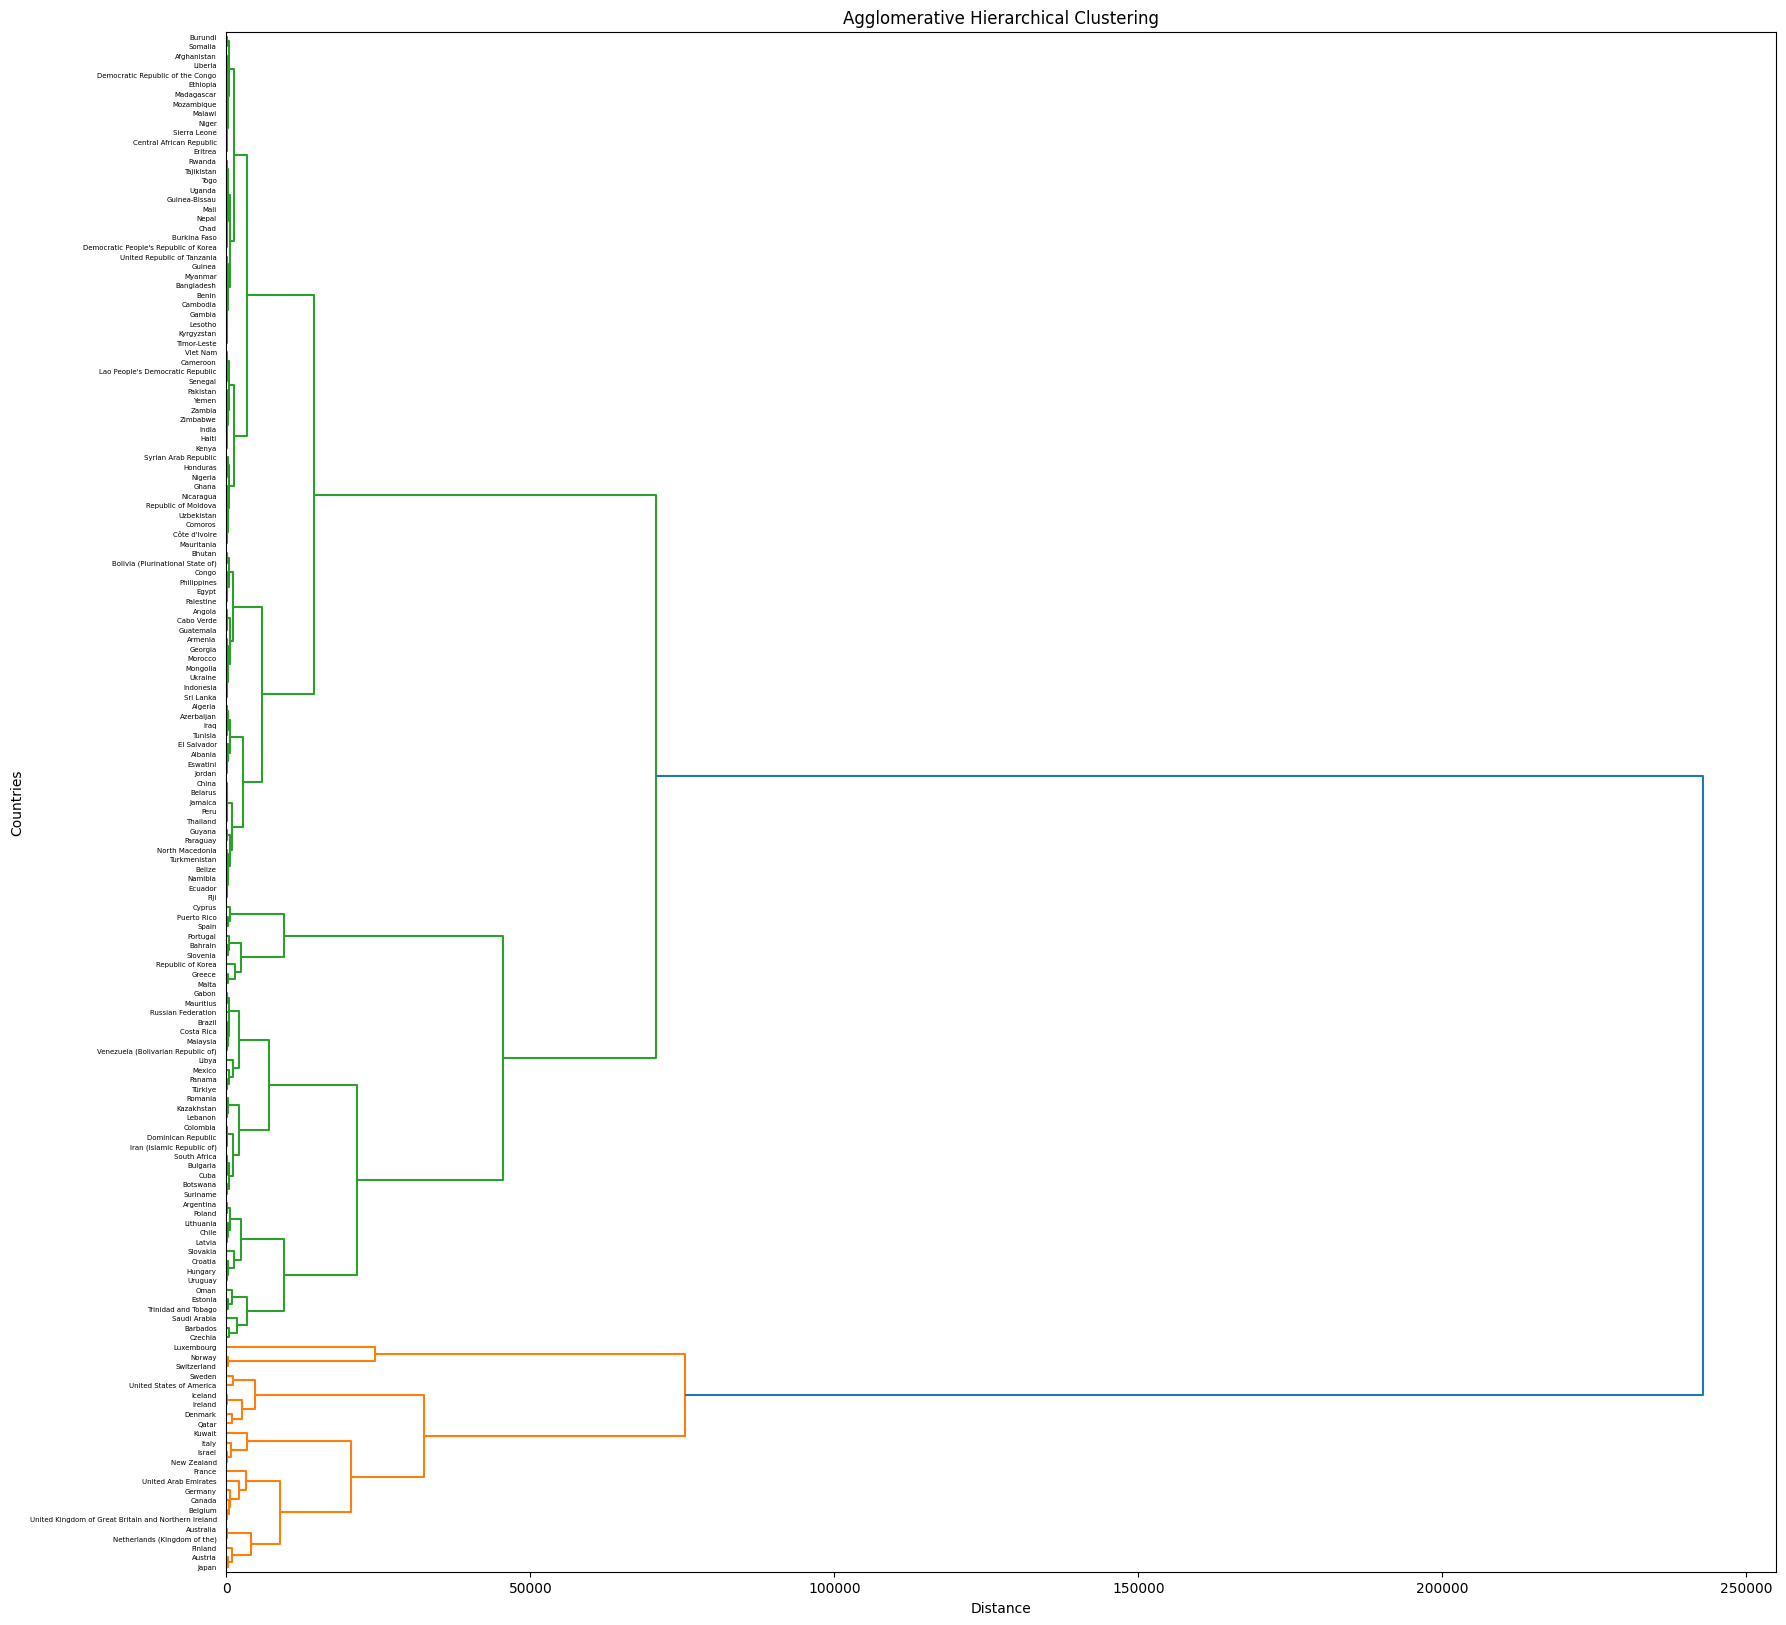

In [37]:

linked = linkage(df_pro_com, method='ward')


# Plot a dendrogram to visualize the clustering process with the cluster labels
plt.figure(figsize=(20, 20))
dendrogram(linked, orientation='right', labels=[country_code[label] for label in country_code], distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Distance')
plt.ylabel('Countries')
plt.show()


In [29]:
from scipy.spatial.distance import pdist, squareform


distances = pdist(df_pro_com, metric='euclidean')

# Convert the condensed distance matrix to a square distance matrix
distance_matrix = squareform(distances)

# Print the pairwise distance matrix
print("Pairwise Distance Matrix:")
print(distance_matrix)

Pairwise Distance Matrix:
[[   0.         2544.42842432 2904.16764145 ...  556.80244342
   636.17698026  699.93630608]
 [2544.42842432    0.          371.74040373 ... 2033.52687294
  1936.74565929 1870.43032125]
 [2904.16764145  371.74040373    0.         ... 2387.270435
  2297.58918287 2230.10559073]
 ...
 [ 556.80244342 2033.52687294 2387.270435   ...    0.
   185.63654671  206.46821591]
 [ 636.17698026 1936.74565929 2297.58918287 ...  185.63654671
     0.           75.72749852]
 [ 699.93630608 1870.43032125 2230.10559073 ...  206.46821591
    75.72749852    0.        ]]


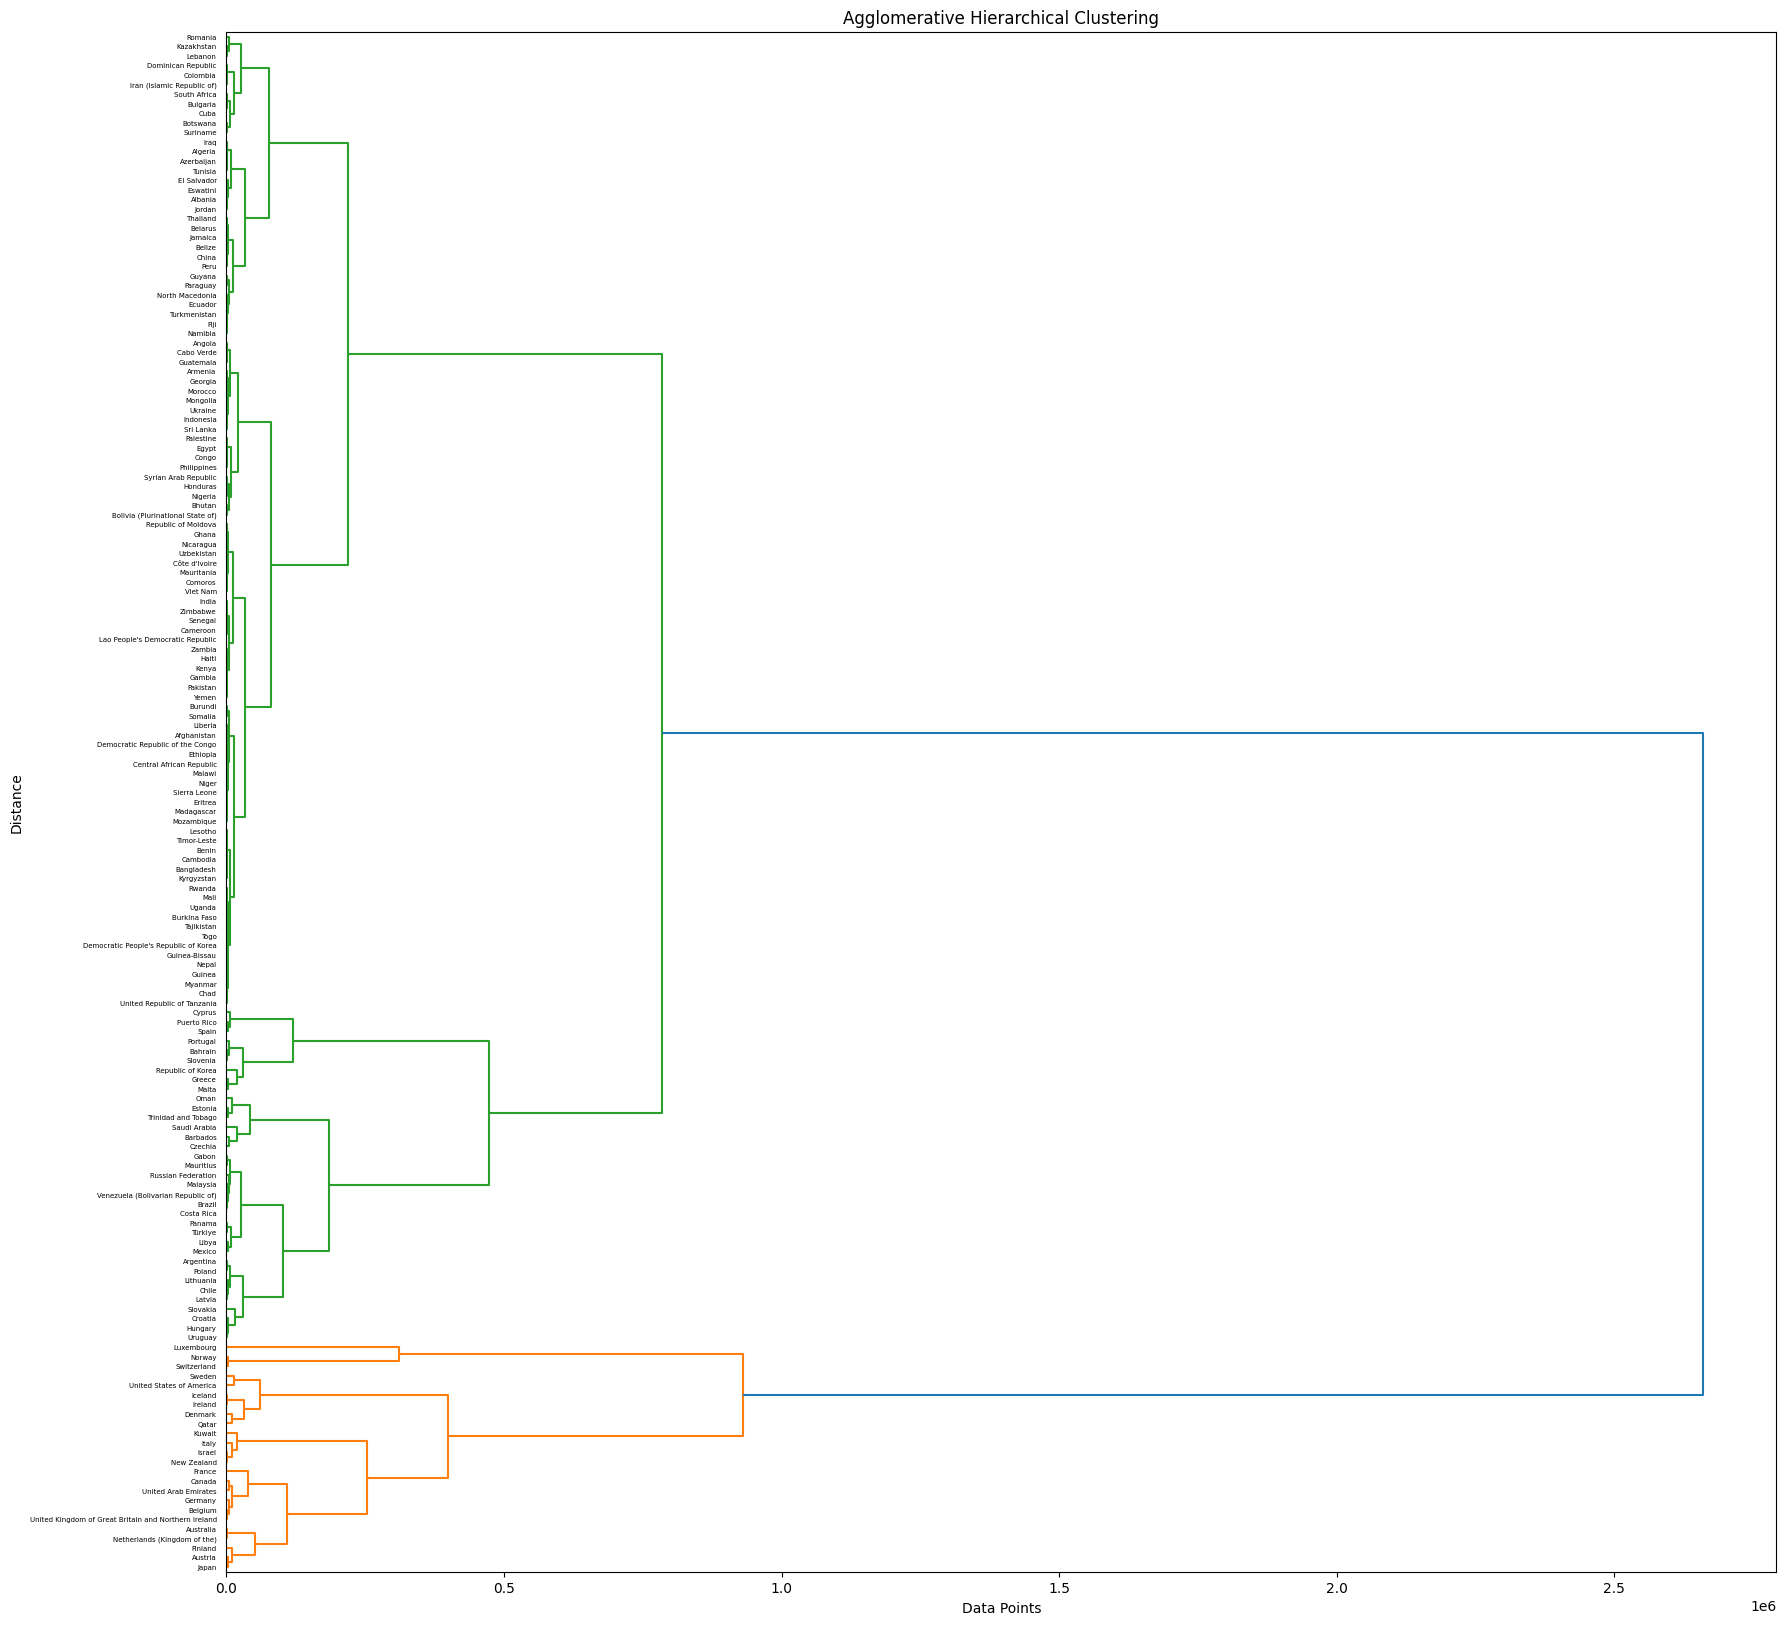

In [42]:
linked_ds = linkage(distance_matrix, method='ward')

# Plot a dendrogram to visualize the clustering process
plt.figure(figsize=(20, 20))
dendrogram(linked_ds, orientation='right', labels=[country_code[label] for label in country_code], distance_sort='descending')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()






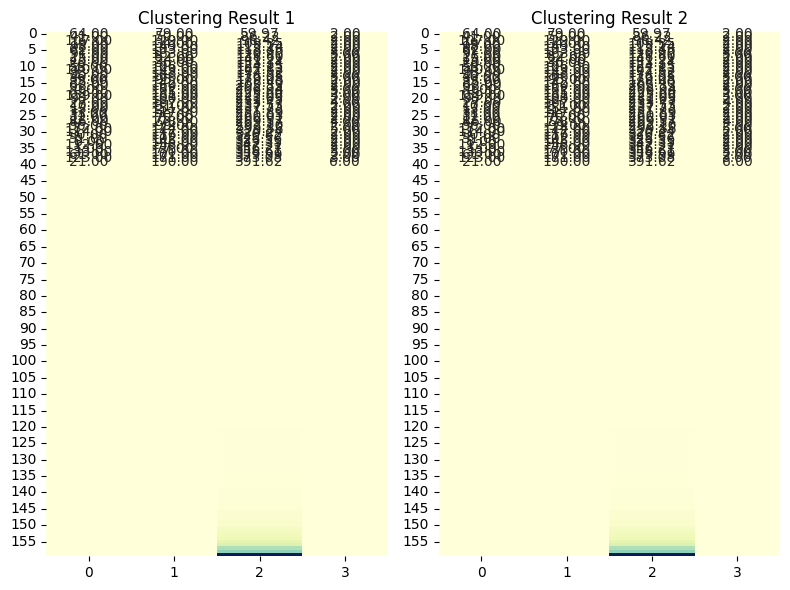

In [44]:
similarity_matrix1 = linked
similarity_matrix2 = linked_ds

# Set up the figure
plt.figure(figsize=(8, 6))

# Create heatmaps for both similarity matrices
plt.subplot(1, 2, 1)  # Create the first subplot
sns.heatmap(similarity_matrix1, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Clustering Result 1")

plt.subplot(1, 2, 2)  # Create the second subplot
sns.heatmap(similarity_matrix2, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Clustering Result 2")

# Adjust the layout and display the heatmaps
plt.tight_layout()
plt.show()

In [47]:
from scipy.cluster.hierarchy import fcluster
linked1 = linked
linked2 = linked_ds

# Convert linkage matrices to cluster assignments using fcluster or another method
cluster_assignments1 = fcluster(linked1, t=4, criterion='distance')
cluster_assignments2 = fcluster(linked2, t=4, criterion='distance')

# Compute the similarity matrices (adjust the similarity metric as needed)
similarity_matrix1 = compute_similarity_matrix(cluster_assignments1)
similarity_matrix2 = compute_similarity_matrix(cluster_assignments2)

# Set up the figure
plt.figure(figsize=(12, 6))

# Create heatmaps for both similarity matrices
plt.subplot(1, 2, 1)  # Create the first subplot
sns.heatmap(similarity_matrix1, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Clustering Result 1")

plt.subplot(1, 2, 2)  # Create the second subplot
sns.heatmap(similarity_matrix2, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Clustering Result 2")

# Adjust the layout and display the heatmaps
plt.tight_layout()
plt.show()

NameError: name 'compute_similarity_matrix' is not defined

### TSNE

In [62]:
# Perform t-SNE for dimensionality reduction (2D visualization)
tsne = TSNE(n_components=2, random_state=0, init="random", perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df_pro_com)

data.loc[:, 'tsne_x'] = tsne_result[:, 0]
data.loc[:, 'tsne_y'] = tsne_result[:, 1]



InvalidIndexError: (slice(None, None, None), 0)